# **Data Visualisation**

## Objectives

* Fulfil project objective - process dataset images so that the client can differentiate a healthy cherry leaf from one with powdery mildew.

## Inputs

* inputs/cherry-leaves/cherry-leaves/train
* inputs/cherry-leaves/cherry-leaves/test
* inputs/cherry-leaves/cherry-leaves/validation

## Outputs

* Resize images to make model suitable for upload 
* Mean and standard deviation of images per label
* Generate image montages for each class

## Additional Comments

* No additional comments



---

# Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import tensorflow as tf
sns.set_style("white")
from matplotlib.image import imread
from PIL import Image 

# Change working directory


Access the current directory with os.getcwd()

In [2]:
cwd = os.getcwd()

Set new directory

In [3]:
os.chdir('/workspace/Mildew-Detection')
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/Mildew-Detection'

## Set Input Directories

In [5]:
my_data_dir = '/workspace/Mildew-Detection/inputs/cherry-leaves/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set Output Directory

In [6]:
# If new version needed, just change version variable
version = 'v1'

file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)


Old version is already available create a new version.


## Set Label Names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'powdery_mildew']


---

# Image Resize

Resize images in all sets

In [8]:
# Resize images to 100x100 pixels
def resize_images(directory, target_size=(100, 100)):
    
    #Resize all images in the set directories to the target size.
    #param directory: Directory containing images to be resized.
    #param target_size: Target size for the images, default is (100, 100).
    
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.endswith(('jpg', 'jpeg', 'png', 'bmp', 'tiff', 'png', 'JPG')):
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                img = img.resize(target_size, Image.Resampling.LANCZOS)
                img.save(img_path)
                print(f"Resized {file} to {target_size}")


Apply resize function to appropriate directories


In [9]:
resize_images(train_path)
resize_images(val_path)
resize_images(test_path)

Resized 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092.JPG to (100, 100)
Resized 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_180deg.JPG to (100, 100)
Resized 0008f3d3-2f85-4973-be9a-1b520b8b59fc___JR_HL 4092_flipTB.JPG to (100, 100)
Resized 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765.JPG to (100, 100)
Resized 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_180deg.JPG to (100, 100)
Resized 0048afb8-b950-4c57-9e72-7e26282327ee___JR_HL 9765_flipTB.JPG to (100, 100)
Resized 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277.JPG to (100, 100)
Resized 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_180deg.JPG to (100, 100)
Resized 0086a8c7-1440-423e-939d-d0567b1fc4e4___JR_HL 4277_flipTB.JPG to (100, 100)
Resized 014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842.JPG to (100, 100)
Resized 014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842_180deg.JPG to (100, 100)
Resized 014161fb-3c15-414b-9af3-00cb51a11d7c___JR_HL 9842_flipTB.JPG to (100, 100)
Resized 01958ee7-f585-4956-90aa-

---

# Load Images in an Array

In [10]:

# Function to load images and labels from the directory
def load_images_and_labels(directory, image_size=(100, 100), batch_size=32, limit_per_label=20):
   
    #loads images and labels from directory using tensorflow
    #param directory: Directory containing the images.
    #param image_size: Target size for the images, default is (100, 100).
    #param batch_size: Number of images to return in each batch.
    #return: A TensorFlow dataset containing image arrays and labels.

    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory,
        labels="inferred",  # Automatically infer labels from directory structure
        label_mode="int",  # Labels are returned as integers
        image_size=image_size,  # Resize images to target size
        batch_size=batch_size  # Number of images per batch
    )
    
    image_array = []
    label_array = []
    
    label_counts = {}
    
    for images, labels in dataset:
        for img, lbl in zip(images.numpy(), labels.numpy()):
            if lbl not in label_counts:
                label_counts[lbl] = 0
            if label_counts[lbl] < limit_per_label:
                image_array.append(img)
                label_array.append(lbl)
                label_counts[lbl] += 1
            if all(count >= limit_per_label for count in label_counts.values()):
                return np.array(image_array), np.array(label_array)
    
    return np.array(image_array), np.array(label_array)

# Load datasets - 20 images per label
train_images, train_labels = load_images_and_labels(train_path, batch_size=20, limit_per_label=20)
val_images, val_labels = load_images_and_labels(val_path, batch_size=20, limit_per_label=20)
test_images, test_labels = load_images_and_labels(test_path, batch_size=20, limit_per_label=20)

# Check shapes
print(f"Train images shape: {train_images.shape}, Train labels shape: {train_labels.shape}")
print(f"Validation images shape: {val_images.shape}, Validation labels shape: {val_labels.shape}")
print(f"Test images shape: {test_images.shape}, Test labels shape: {test_labels.shape}")


Found 2944 files belonging to 2 classes.


2024-08-22 11:15:32.733341: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-22 11:15:32.848754: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Found 420 files belonging to 2 classes.
Found 844 files belonging to 2 classes.
Train images shape: (40, 100, 100, 3), Train labels shape: (40,)
Validation images shape: (40, 100, 100, 3), Validation labels shape: (40,)
Test images shape: (40, 100, 100, 3), Test labels shape: (40,)


# Plot Mean and Variability

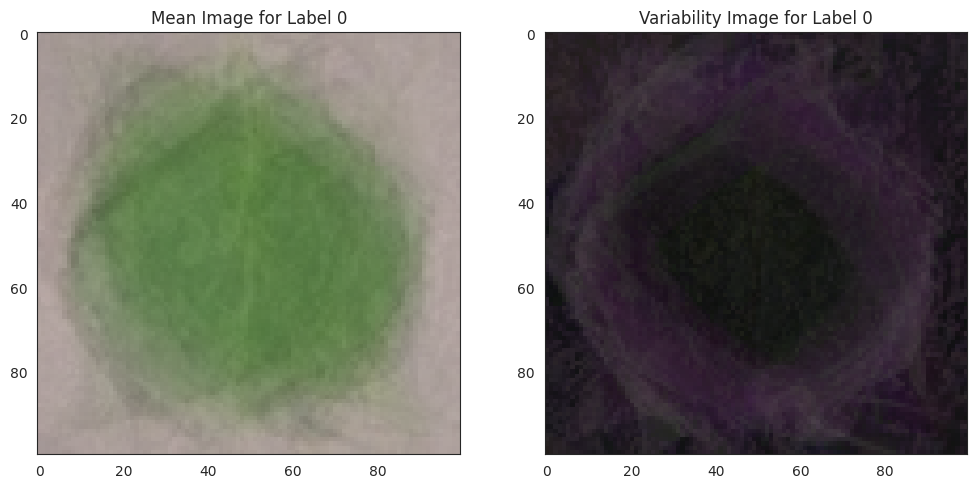

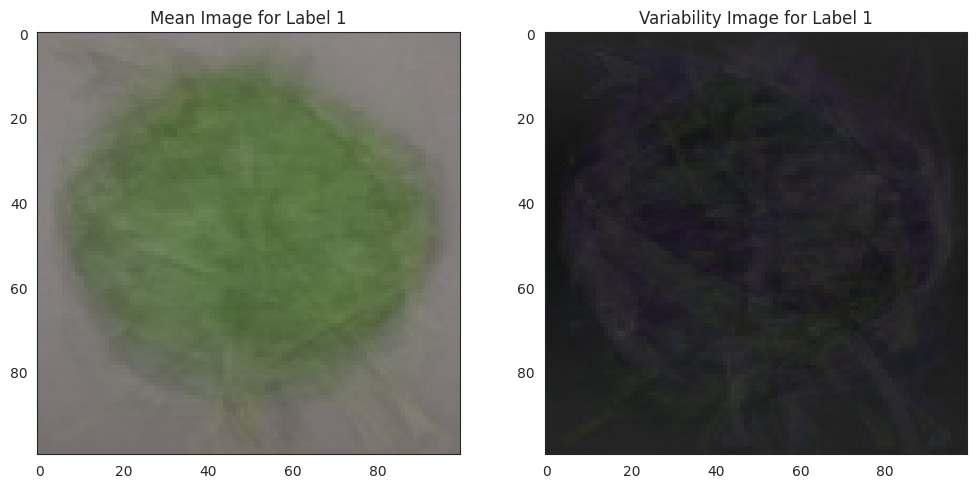

Mean and variability images saved to outputs/v1


In [11]:

output_dir = file_path

# Function to comput mean and variability of images for labels

def compute_mean_variability(images, labels):
    unique_labels = np.unique(labels)
    mean_images = {}
    std_images = {}
    
    for label in unique_labels:
        label_images = images[labels == label]
        mean_images[label] = np.mean(label_images, axis=0)
        std_images[label] = np.std(label_images, axis=0)
    
    return mean_images, std_images

# Compute the mean and standard deviation for train images
mean_images, std_images = compute_mean_variability(train_images, train_labels)

# Plot and save mean and variability images
for label in mean_images.keys():
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(mean_images[label].astype(np.uint8))
    plt.title(f'Mean Image for Label {label}')
    
    plt.savefig(os.path.join(output_dir, f"mean_image_label_{label}.png"), bbox_inches='tight', dpi=150)

    plt.subplot(1, 2, 2)
    plt.imshow(std_images[label].astype(np.uint8))
    plt.title(f'Variability Image for Label {label}')

    plt.savefig(os.path.join(output_dir, f"variability_image_label_{label}.png"), bbox_inches='tight', dpi=150)
    
    plt.show()

print(f"Mean and variability images saved to {output_dir}")



# Display Difference Between Subsets

In [12]:

# Compute mean images for each label
def compute_mean_images(images, labels):
    unique_labels = np.unique(labels)
    mean_images = {}
    
    for label in unique_labels:
        label_images = images[labels == label]
        mean_images[label] = np.mean(label_images, axis=0)
    
    return mean_images

# Function to normalize an image to the range [0, 255]
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized_image = 255 * (image - min_val) / (max_val - min_val)
    return normalized_image

# Function to compute and display the average images and the difference image
def compare_infected_uninfected(images, labels, infected_label=1, uninfected_label=0, save_image=True):
    mean_images = compute_mean_images(images, labels)
    
    mean_infected = mean_images[infected_label]
    mean_uninfected = mean_images[uninfected_label]
    
    difference_image = mean_infected - mean_uninfected
    
    # Normalise the difference image to aid in visualisation
    difference_image = normalize_image(difference_image)
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    # Plot images
    axes[0].imshow(mean_infected.astype(np.uint8))
    axes[0].set_title('Average Infected Leaf')
    axes[0].axis('off')  # Hide axes

    axes[1].imshow(mean_uninfected.astype(np.uint8))
    axes[1].set_title('Average Uninfected Leaf')
    axes[1].axis('off')  # Hide axes

    axes[2].imshow(difference_image.astype(np.uint8), cmap='gray')
    axes[2].set_title('Difference Image (Infected - Uninfected)')
    axes[2].axis('off')  # Hide axes
    
    plt.tight_layout()  # Adjust plot spacing

    # Save images
    if save_image:
        plt.savefig(f"{file_path}/avg_infected_uninfected_diff.png", bbox_inches='tight', dpi=150)

    plt.show()  # Display the image



Apply image differentiation to train subset 

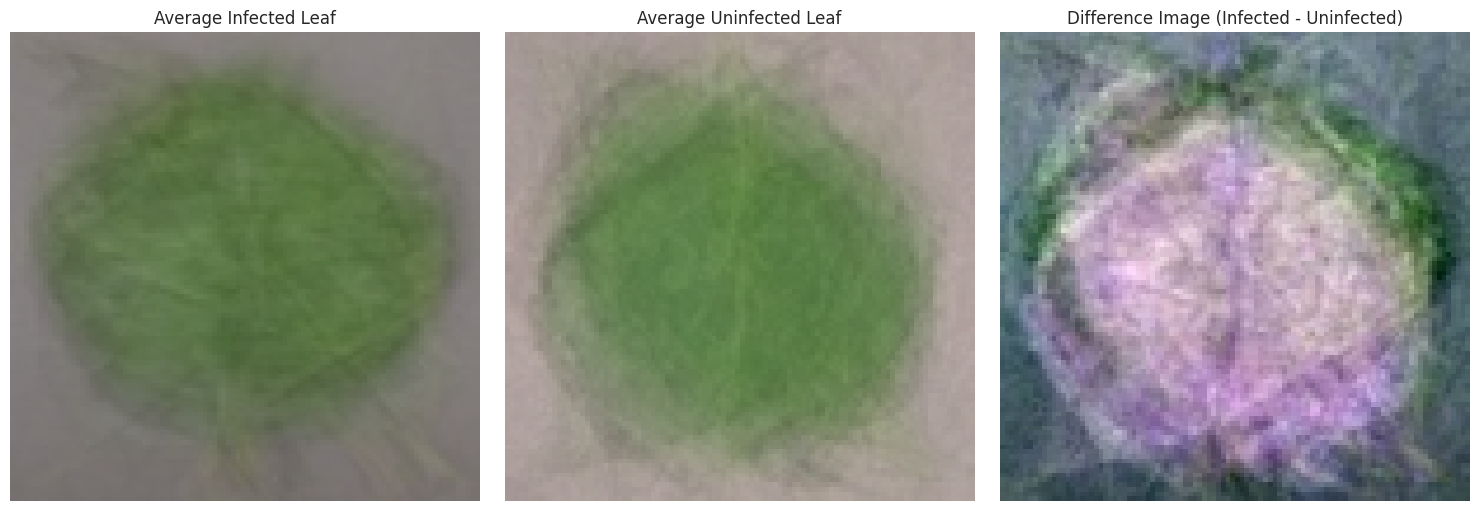

In [13]:
compare_infected_uninfected(train_images, train_labels, infected_label=1, uninfected_label=0)

# Create Image Montages

In [14]:
# Function to create image montage
def create_montage(images, labels, label_name, n_images=20, montage_size=(5, 4)):
    label_images = images[labels == label_name][:n_images]
    fig, axes = plt.subplots(montage_size[1], montage_size[0], figsize=(12, 10))
    axes = axes.flatten()
    
    for img, ax in zip(label_images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    
    plt.suptitle(f"Montage of {n_images} Images for Label {label_name}", fontsize=16)
    plt.show()

Apply image montage function to train set 

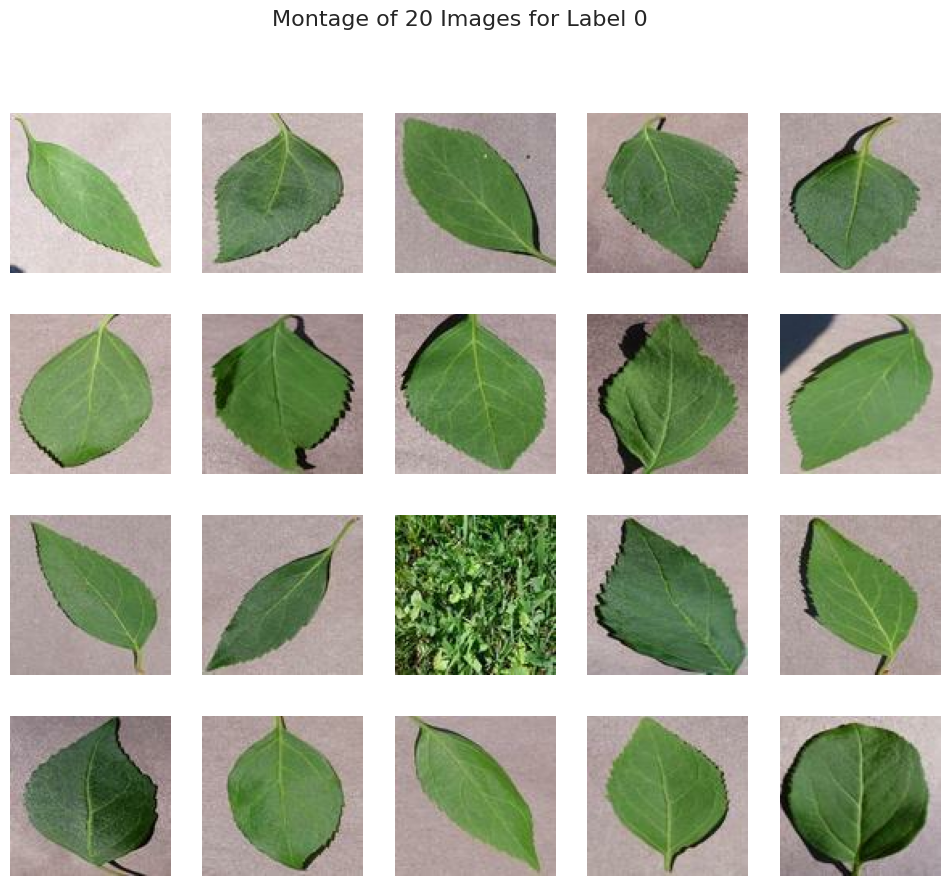

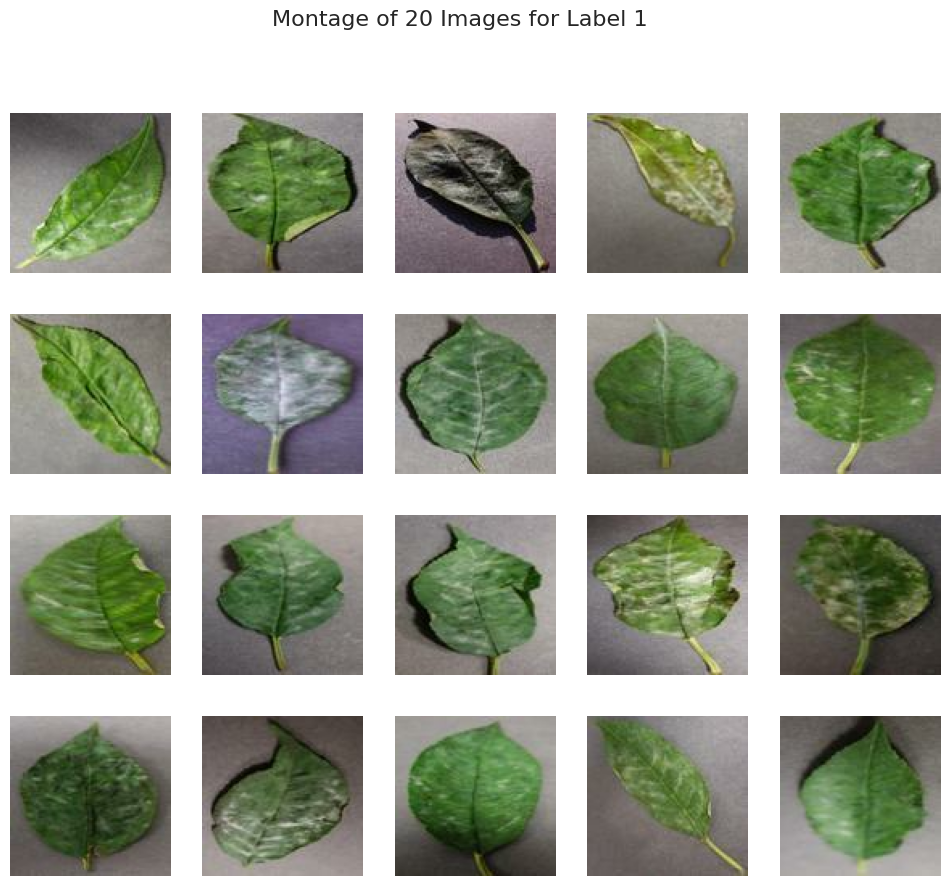

In [15]:
# Create montages for train set  (assuming 0 = non-infected, 1 = infected)
create_montage(train_images, train_labels, label_name=0)
create_montage(train_images, train_labels, label_name=1)

---

# Conclusions and Next Steps

* The images have been resized to better suit the project requirements 
* The image data has been processed to create visualisations of image mean and variability
* A visualisation of the difference between infected and uninfected leaves has been produced
* A montage of infected and uninfected leaves has been created
* Next steps are to use the image data to create and train the machine learning model to make predictions